<a href="https://colab.research.google.com/github/juanserrano90/codelatam/blob/main/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/juanserrano90/codelatam/blob/main/Training/ViT/Augmented_Data_ViT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/juanserrano90/codelatam.git

Cloning into 'codelatam'...
remote: Enumerating objects: 14279, done.
remote: Counting objects: 100% (822/822), done.
remote: Compressing objects: 100% (820/820), done.
remote: Total 14279 (delta 13), reused 789 (delta 2), pack-reused 13457 (from 1)
Receiving objects: 100% (14279/14279), 204.89 MiB | 18.00 MiB/s, done.
Resolving deltas: 100% (284/284), done.
Updating files: 100% (26535/26535), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Data

In [3]:
# read augmented_images folder and create a list of images for each subfolder
import os

image_lists = {}
root_dir = 'codelatam/Data/augmented_images_v2'

for subdir, dirs, files in os.walk(root_dir):
  for file in files:
    if file.endswith(('.jpg', '.jpeg', '.png')):
      subdir_name = os.path.basename(subdir)
      if subdir_name not in image_lists:
        image_lists[subdir_name] = []
      # image_lists[subdir_name].append(os.path.join(subdir, file))
      image_lists[subdir_name].append(file)

# Print the list of images for each subfolder
sum_img = 0
for subdir_name, image_list in image_lists.items():
  sum_img += len(image_list)
  print(f"Subfolder: {subdir_name}, Number of images: {len(image_list)}")
  print(image_list)  # Uncomment to print the full list of images
print(f"Total number of images: {sum_img}")


Subfolder: 1, Number of images: 2385
['sn2005gj_3_0_39.4_2428.png', 'sn1986G_2_0_0.3_2632.png', 'sn2005hk_4_0_65.5_4090_COPY.png', 'sn08A_4_0_0.791_3929_COPY.png', 'sn00cx_5_0_0.6_3809_COPY.png', 'sn2001ah_1_0_-9.7_3210.png', 'sn2005gj_3_0_64.9_4492_COPY.png', 'sn2005eq_1_0_14.0_3184.png', 'sn1999aa_1_0_27.4_3010.png', 'sn2007if_5_0_33.4_3873_COPY.png', 'sn2005hk_4_0_23.4_4130_COPY.png', 'sn2003hu_1_0_8.4_2970.png', 'sn2008A_4_0_23.6_4045_COPY.png', 'sn2007if_5_0_9.4_2463.png', 'sn2005hk_4_0_42.9_4195_COPY.png', 'sn1997br_1_0_37.6_2520.png', 'sn02cx_4_0_-5.3_4163_COPY.png', 'sn1999by_2_0_-3.0_3482_COPY.png', 'sn1986G_2_0_53.7_3566_COPY.png', 'sn2006H_2_0_15.3_3425_COPY.png', 'sn2005hk_4_0_12.4_4229_COPY.png', 'sn99by_2_0_3.1_3277.png', 'sn2002ic_3_0_9.4_4489_COPY.png', 'sn2008A_4_0_20.6_2851.png', 'sn2002ic_3_0_31.9_4490_COPY.png', 'sn02cx_4_0_-2.4_3977_COPY.png', 'sn99by_2_0_25.1_3283.png', 'sn02cx_4_0_23.0_4274_COPY.png', 'sn05gj_3_0_74.499_4671_COPY.png', 'sn2008A_4_0_-7.9_4008_COPY

In [4]:
def maping(a):
  subtype_to_category = {0:0, 1:1, 2:1, 3:1, 4:1, 5:1, 6:2, 7:2, 8:2, 9:2, 10:2, 11:2, 12:2, 13:2, 14:2, 15:2, 16:2}
  return subtype_to_category[a]

inv_dict_mapping_classes = {0:'Ia-norm', 1:'Ia-pec', 2:'Others'}

# Checking augmented data

In [5]:
# For each subfolder, separate the images that say COPY in their path from those that do not.
import os

def separate_images_with_copy(images_by_subfolder):
  """
  Separates images in each subfolder based on whether 'COPY' is in their path.

  Args:
    images_by_subfolder: A dictionary where keys are subfolder names and values are lists of image paths.

  Returns:
    A dictionary with the same subfolder keys, but values are now dictionaries
    containing 'with_copy' and 'without_copy' lists of images.
  """
  separated_images = {}
  for subfolder, image_list in images_by_subfolder.items():
    with_copy = []
    without_copy = []
    for image_path in image_list:
      if 'COPY' in image_path:
        if subfolder == '1':  # FIX 1: there is a problem with the SN labeling
          str_list = image_path.split("_")
          with_copy.append("_".join(str_list[:-3])) # remove the copy counter and the .png string
        else:
          str_list = image_path.split("_")
          if any(ele in str_list[1] for ele in ['6', '8', '10', '11', '16']): # FIX 2: There are categories labeled as copies (even though they are not)
            without_copy.append("_".join(str_list[:-2]))
          else:
            with_copy.append("_".join(str_list[:-2])) # remove the copy counter and the .png string
      else:
        str_list = image_path.split("_")
        without_copy.append("_".join(str_list[:-1]))
    separated_images[subfolder] = {'with_copy': with_copy, 'without_copy': without_copy}
  return separated_images

separated_images = separate_images_with_copy(image_lists)

for subfolder, image_dict in separated_images.items():
  print(f"Subfolder: {subfolder}")
  print(f"  Copied images: {len(image_dict['with_copy'])}")
  # Uncomment to print the list of images with 'COPY'
  print(f"    Image list: {image_dict['with_copy']}")
  print(f"  Original images: {len(image_dict['without_copy'])}")
  # Uncomment to print the list of images without 'COPY'
  print(f"    Image list: {image_dict['without_copy']}")


Subfolder: 1
  Copied images: 1484
    Image list: ['sn2005hk_4_0', 'sn08A_4_0', 'sn00cx_5_0', 'sn2005gj_3_0', 'sn2007if_5_0', 'sn2005hk_4_0', 'sn2008A_4_0', 'sn2005hk_4_0', 'sn02cx_4_0', 'sn1999by_2_0', 'sn1986G_2_0', 'sn2006H_2_0', 'sn2005hk_4_0', 'sn2002ic_3_0', 'sn2002ic_3_0', 'sn02cx_4_0', 'sn02cx_4_0', 'sn05gj_3_0', 'sn2008A_4_0', 'sn00cx_5_0', 'sn2002ic_3_0', 'sn2007ax_2_0', 'sn2005gj_3_0', 'sn2005gj_3_0', 'sn00cx_5_0', 'sn2005hk_4_0', 'sn2005gj_3_0', 'sn2007if_5_0', 'sn2005hj_1_0', 'sn2002ic_3_0', 'sn2002cx_4_0', 'sn2000cx_5_0', 'sn2002ic_3_0', 'sn2006gz_5_0', 'sn2005bl_2_0', 'sn2005gj_3_0', 'sn2005cc_5_0', 'sn2002cx_4_0', 'sn2002ic_3_0', 'sn2005hj_1_0', 'sn2008A_4_0', 'sn91bg_2_0', 'sn02cx_4_0', 'sn2005gj_3_0', 'sn2005cc_5_0', 'sn2005hk_4_0', 'sn2007al_2_0', 'sn2002cx_4_0', 'sn2008A_4_0', 'sn2006gz_5_0', 'sn2008A_4_0', 'sn2002hu_1_0', 'sn2005hk_4_0', 'sn2005gj_3_0', 'sn06cs_2_0', 'sn2005hk_4_0', 'sn02cx_4_0', 'sn2007if_5_0', 'sn2007if_5_0', 'sn2005gj_3_0', 'sn2007if_5_0', 'sn2

In [6]:
# for each 'without_copy' string, count how many strings are repeated in 'with_copy'
import collections

count_dict = {}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_without_copy in without_copy_list:
    count = with_copy_list.count(image_without_copy)
    if image_without_copy not in count_dict:
      count_dict[image_without_copy] = count
    else:
      count_dict[image_without_copy] += count

# create a pandas dataframe using count_dict
import pandas as pd

df = pd.DataFrame(list(count_dict.items()), columns=['Image', 'Copies'])
df['Category'] = df['Image'].str.split('_').str[1]
print(df)


                   Image  Copies Category
0      sn2005gj_3_0_39.4       0        3
1        sn1986G_2_0_0.3       0        2
2      sn2001ah_1_0_-9.7       0        1
3      sn2005eq_1_0_14.0       0        1
4      sn1999aa_1_0_27.4       0        1
...                  ...     ...      ...
4635   sn2004gq_6_1_78.4       0        6
4636  sn2002ap_11_2_12.7       0       11
4637    sn2005bf_6_1_0.2       0        6
4638   sn1987A_16_3_94.3       0       16
4639  sn2011ei_8_1_310.0       0        8

[4640 rows x 3 columns]


In [7]:
SNsubtype_original = {i: 0 for i in range(0, 17)}
SNsubtype_copies = {i: 0 for i in range(0, 17)}
SNsubtype_total = {i: 0 for i in range(0, 17)}

for subfolder, image_dict in separated_images.items():
  without_copy_list = image_dict['without_copy']
  with_copy_list = image_dict['with_copy']

  for image_name in without_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_original:
      SNsubtype_original[int(image_name.split('_')[1])] += 1

  for image_name in with_copy_list:
    if int(image_name.split('_')[1]) in SNsubtype_copies:
      SNsubtype_copies[int(image_name.split('_')[1])] += 1

  for key,value in SNsubtype_total.items():
    SNsubtype_total[key] = SNsubtype_original[key] + SNsubtype_copies[key]

In [8]:
# convert SNsubtype_original, SNsubtype_copies and SNsubtype_total to a one pandas dataframe
#   where the columns labels are N° originals, N° copies and N° total respectively
#   and each row label is the key of the dictionary

import pandas as pd
id_to_subtype = {0: 'Ia-norm',
 1: 'Ia-91T',
 3: 'Ia-csm',
 2: 'Ia-91bg',
 6: 'Ib-norm',
 4: 'Iax',
 5: 'Ia-pec',
 10: 'Ic-norm',
 13: 'IIP',
 14: 'IIL',
 8: 'IIb',
 16: 'II-pec',
 11: 'Ic-broad',
 12: 'Ic-pec',
 15: 'IIn',
 7: 'Ibn',
 9: 'Ib-pec'}

# Create a list of dictionaries, where each dictionary represents a row
rows = []
for key in SNsubtype_original:
  row = {
      'N° originals': SNsubtype_original[key],
      'N° copies': SNsubtype_copies[key],
      'N° total': SNsubtype_total[key]
  }
  rows.append(row)

# Create the DataFrame from the list of dictionaries
df = pd.DataFrame(rows, index=SNsubtype_original.keys())
df.index.name = "ID"
df['Category'] = df.index.map(maping)
df['Subtype'] = df.index.map(id_to_subtype)
df = df[['Category', 'Subtype', 'N° originals', 'N° copies', 'N° total']]
print(df)

    Category   Subtype  N° originals  N° copies  N° total
ID                                                       
0          0   Ia-norm          2387          0      2387
1          1    Ia-91T           398         79       477
2          1   Ia-91bg           264        213       477
3          1    Ia-csm            30        447       477
4          1       Iax            68        409       477
5          1    Ia-pec           141        336       477
6          2   Ib-norm           217          0       217
7          2       Ibn            31        186       217
8          2       IIb           216          0       216
9          2    Ib-pec            15        202       217
10         2   Ic-norm           217          0       217
11         2  Ic-broad           217          0       217
12         2    Ic-pec            33        184       217
13         2       IIP           176         41       217
14         2       IIL            13        204       217
15         2  

Images per class:

In [12]:
# for each category, show the row sum of the column "N° total"
category_total = df.groupby('Category')['N° total'].sum()
print(category_total)

Category
0    2387
1    2385
2    2386
Name: N° total, dtype: int64


Unique SNs by class:

In [46]:
from collections import defaultdict

# Dictionary to store base name counts and their subtypes for each subfolder
alld = dict()
for subfolder, images in image_lists.items():
    alld[subfolder] = defaultdict(lambda: {'count': 0, 'subtype': set()})
    for image in images:
        base_name = image.split('_')[0]
        subtype = image.split('_')[1]
        alld[subfolder][base_name]['count'] += 1
        alld[subfolder][base_name]['subtype'].add(subtype)

# Print the results for each class
for i in range(3):
    unique_sn_count = len(alld[str(i)].keys())
    print(f'Class {i}: {unique_sn_count} unique SNs')

Class 0: 319 unique SNs
Class 1: 95 unique SNs
Class 2: 102 unique SNs


This is why we can't balance subtype in train/test for class 2
(each subtype has 217 images)

In [34]:
# Sort and print the top 10 base names by count for Class 2
class_2_data = alld['2']
sorted_class_2 = sorted(class_2_data.items(), key=lambda x: x[1]['count'], reverse=True)

print("Top 10 base names by count for Class 2:")
for base_name, data in sorted_class_2[:15]:
    print(f"{base_name}: Count = {data['count']}, Subtype = {data['subtype']}")

Top 10 base names by count for Class 2:
sn1987A: Count = 217, Subtype = {'16'}
sn1998S: Count = 195, Subtype = {'15'}
sn2004aw: Count = 169, Subtype = {'12'}
sn2007uy: Count = 157, Subtype = {'9'}
sn2006jc: Count = 141, Subtype = {'7'}
sn1980K: Count = 139, Subtype = {'14'}
sn1979C: Count = 78, Subtype = {'14'}
sn2005la: Count = 60, Subtype = {'9'}
sn2004et: Count = 56, Subtype = {'13'}
sn1999em: Count = 56, Subtype = {'13'}
sn2005cs: Count = 54, Subtype = {'13'}
sn2000er: Count = 50, Subtype = {'7'}
sn1993J: Count = 48, Subtype = {'8'}
sn2005ek: Count = 48, Subtype = {'12'}
sn2009jf: Count = 38, Subtype = {'6'}


In [53]:
# this SNs must be on train set
force_train = ['sn1987A', 'sn1998S', 'sn2004aw', 'sn2007uy', 'sn2006jc', 'sn1980K', 'sn1979C']

In [75]:
sum = 0
for i in force_train:
  sum = sum + alld['2'][i]['count']
print(sum)

1096


How many images in image_lists:

In [42]:
# count how many images are in image_lists
total_images = sum(len(images) for images in image_lists.values())
print(f"Total number of images: {total_images}")

Total number of images: 7158


# Create train/val/test without repeating unique SNs in different splits

In [ ]:
# import collections
# import random

# def create_train_val_test_splits(image_lists, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
#   """
#   Creates train, validation, and test splits for images in each subfolder,
#   ensuring that images with the same base name are not repeated across splits.

#   Args:
#     image_lists: A dictionary where keys are subfolder names and values are lists of image paths.
#     train_ratio: The proportion of images to include in the training set.
#     val_ratio: The proportion of images to include in the validation set.
#     test_ratio: The proportion of images to include in the test set.

#   Returns:
#     A dictionary with subfolder names as keys and values as dictionaries containing 'train', 'val', and 'test' lists of images.
#   """

#   splits = {}
#   for subfolder, image_list in image_lists.items():
#     num_images = len(image_list)
#     num_train = int(num_images * train_ratio)
#     num_val = int(num_images * val_ratio)
#     num_test = num_images - num_train - num_val

#     random.shuffle(image_list)  # Shuffle the image list for random splitting

#     # Extract base names to avoid duplicates
#     base_names = {}  # Use a dictionary to store the split assignment for each base name
#     train_images = []
#     val_images = []
#     test_images = []
#     for image_path in image_list:
#       base_name = image_path.split('_')[0]  # Names are separated by "_"
#       if base_name not in base_names:
#         # Assign the base name to a split randomly
#         rand_val = random.random()
#         if rand_val < train_ratio:
#           base_names[base_name] = 'train'
#         elif rand_val < train_ratio + val_ratio:
#           base_names[base_name] = 'val'
#         else:
#           base_names[base_name] = 'test'

#       if base_names[base_name] == 'train' and len(train_images) < num_train:
#         train_images.append(image_path)
#       elif base_names[base_name] == 'val' and len(val_images) < num_val:
#         val_images.append(image_path)
#       elif base_names[base_name] == 'test' and len(test_images) < num_test:
#         test_images.append(image_path)
#       else:
#         if base_names[base_name] == 'train':
#           train_images.append(image_path)
#         elif base_names[base_name] == 'val':
#           val_images.append(image_path)
#         elif base_names[base_name] == 'test':
#           test_images.append(image_path)

#     splits[subfolder] = {'train': train_images, 'val': val_images, 'test': test_images}

#   return splits

In [89]:
import random
import collections

def create_train_test_splits(image_lists, train_ratio=0.85, test_ratio=0.15):
    """
    Creates train and test splits for images in each subfolder,
    ensuring that images with the same base name are not repeated across splits,
    and that at least one base name for each subtype is included in the test set for subfolder 1.
    Additionally, for subfolder 2, ensures specific base names go into the train set.

    Args:
        image_lists: A dictionary where keys are subfolder names and values are lists of image paths.
        train_ratio: The proportion of images to include in the training set.
        test_ratio: The proportion of images to include in the test set.

    Returns:
        A dictionary with subfolder names as keys and values as dictionaries containing 'train' and 'test' lists of images.
    """
    splits = {}
    subtypes = {}
    # Subtype mappings for subfolder 1
    subtype_ranges = {
        "0": [0],             # Subfolder 0 has subtype 0
        "1": list(range(1, 6)),  # Subfolder 1 has subtypes 1 to 5
        "2": list(range(6, 17))  # Subfolder 2 has subtypes 6 to 16
    }

    # Base names to force into train set for subfolder 2
    force_train = ['sn1987A', 'sn1998S', 'sn2004aw', 'sn2007uy', 'sn2006jc', 'sn1980K', 'sn1979C']

    for subfolder, image_list in image_lists.items():
        # Shuffle the image list to randomize
        random.shuffle(image_list)

        # Extract subtype information for each image
        subtype_dict = collections.defaultdict(list)
        for image_path in image_list:
            subtype = int(image_path.split('_')[1])  # Extract subtype as an integer
            subtype_dict[subtype].append(image_path)

        train_images = set()
        test_images = set()
        base_names = {}
        assigned_subtypes = set()

        if subfolder == "1":
            # Step 1: Ensure at least one base name for each subtype in the test set for subfolder 1
            for subtype in subtype_ranges[subfolder]:
                if subtype in subtype_dict:
                    paths = subtype_dict[subtype]
                    random.shuffle(paths)  # Shuffle to ensure randomness
                    for path in paths:
                        base_name = path.split('_')[0]
                        if base_name not in base_names:
                            base_names[base_name] = 'test'
                            test_images.add(path)
                            assigned_subtypes.add(subtype)
                            break  # Stop once we've added one base name for this subtype

        # Step 2: Distribute remaining images into train and test sets
        for image_path in image_list:
            base_name = image_path.split('_')[0]

            # Ensure specific base names go into train set for subfolder 2
            if subfolder == "2" and base_name in force_train:
                base_names[base_name] = 'train'
                train_images.add(image_path)
            else:
              if base_name not in base_names:
                  if random.random() < train_ratio:
                      base_names[base_name] = 'train'
                      train_images.add(image_path)
                  else:
                      base_names[base_name] = 'test'
                      test_images.add(image_path)
              else:
                  # Add to the respective split based on the assigned base name
                  if base_names[base_name] == 'train':
                      train_images.add(image_path)
                  elif base_names[base_name] == 'test':
                      test_images.add(image_path)

        # Collect the subtypes for train and test splits
        train_subtypes = {int(image.split('_')[1]) for image in train_images}
        test_subtypes = {int(image.split('_')[1]) for image in test_images}

        splits[subfolder] = {'train': list(train_images), 'test': list(test_images)}
        subtypes[subfolder] = {'train': train_subtypes, 'test': test_subtypes}

    return splits, subtypes

In [150]:
# Keep trying splits until the ratios are within the tolerance.
counter = 0
while True:
  splits, subtypes = create_train_test_splits(image_lists)
  counter += 1
  tolerance = 0.03
  a = []
  c = []
  for i in range(3):
    subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['test'])
    a.append(round(len(splits[str(i)]['train'])/subtotal,2))
    c.append(round(len(splits[str(i)]['test'])/subtotal,2))

  # if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and len(subtypes['2']['test']) == 8:
  if abs(a[0]-0.85) < tolerance and  abs(c[0]-0.15) < tolerance and abs(a[1]-0.85) < tolerance and \
     abs(c[1]-0.15) < tolerance and abs(a[2]-0.85) < tolerance and abs(c[2]-0.15) < tolerance and \
     6 in subtypes['2']['test'] and 7 in subtypes['2']['test'] and 8 in subtypes['2']['test'] and \
     10 in subtypes['2']['test'] and 11 in subtypes['2']['test'] and 13 in subtypes['2']['test'] and \
     15 in subtypes['2']['test']:

      good_split = splits
      break

# Print the number of images in each split for each subfolder
print('iterations:', counter)
for key, value in splits.items():
  print(f"{key}: {value}")

iterations: 16128
1: {'train': ['sn2007if_5_0_10.3_2464.png', 'sn2007if_5_0_-9.2_3733_COPY.png', 'sn2001V_1_0_39.9_2758.png', 'sn99by_2_0_25.1_3283.png', 'sn1999aa_1_0_-1.6_2998.png', 'sn2002ic_3_0_31.9_4395_COPY.png', 'sn00cx_5_0_1.6_3874_COPY.png', 'sn2005cc_5_0_19.4_2552.png', 'sn2002ic_3_0_31.9_4505_COPY.png', 'sn1998es_1_0_18.3_2872.png', 'sn2008A_4_0_20.6_4194_COPY.png', 'sn2007if_5_0_62.3_3799_COPY.png', 'sn00cx_5_0_1.6_3762_COPY.png', 'sn1986G_2_0_-1.2_3557_COPY.png', 'sn2005M_1_0_27.6_3353_COPY.png', 'sn2005hk_4_0_27.2_4074_COPY.png', 'sn1999ac_1_0_-3.9_2390.png', 'sn2005gj_3_0_27.3_4417_COPY.png', 'sn2005bl_2_0_22.3_3438_COPY.png', 'sn2006gz_5_0_5.3_3119.png', 'sn2002ic_3_0_44.1_4390_COPY.png', 'sn1995bd_1_0_-7.1_2958.png', 'sn91bg_2_0_14.7_3479_COPY.png', 'sn2008A_4_0_-1.0_4244_COPY.png', 'sn00cn_2_0_14.95_3579_COPY.png', 'sn2008A_4_0_-3.0_4322_COPY.png', 'sn2005gj_3_0_27.3_4376_COPY.png', 'sn2002ic_3_0_44.1_4501_COPY.png', 'sn1998es_1_0_72.7_2879.png', 'sn08ds_1_0_56.774_33

In [151]:
# check the number of images in each split
total = 0
print('images per split:')
for i in range(3):
  print(len(splits[str(i)]['train']), len(splits[str(i)]['test']))
  total += len(splits[str(i)]['train']) + len(splits[str(i)]['test'])
print('----------------')
print('total images:', total)
# proportions
print('----------------')
print('proportions:')
for i in range(3):
  subtotal = len(splits[str(i)]['train'])+len(splits[str(i)]['test'])
  print(round(len(splits[str(i)]['train'])/subtotal,2), round(len(splits[str(i)]['test'])/subtotal,2))

  splits[str(i)]['test']

images per split:
1984 403
2052 333
2057 329
----------------
total images: 7158
----------------
proportions:
0.83 0.17
0.86 0.14
0.86 0.14


In [152]:
# Print the different subtypes in train and test for each subfolder
for subfolder, subtype_info in subtypes.items():
    print(f"Subfolder {subfolder}:")
    print(f"  Train subtypes: {sorted(subtype_info['train'])}")
    print(f"  Test subtypes: {sorted(subtype_info['test'])}")


Subfolder 1:
  Train subtypes: [1, 2, 3, 4, 5]
  Test subtypes: [1, 2, 3, 4, 5]
Subfolder 0:
  Train subtypes: [0]
  Test subtypes: [0]
Subfolder 2:
  Train subtypes: [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
  Test subtypes: [6, 7, 8, 10, 11, 13, 15]


In [153]:
import pickle
# save the dictionary to a file to recover the same split later (because it's random everytime)
# last split: 0.83, 0.86, 0.86, [6, 7, 8, 10, 11, 13, 15]

# with open('drive/MyDrive/lssds24/codelatam/saved_test_train_split.pkl', 'wb') as f:
#     pickle.dump(splits, f)

In [154]:
# load the saved split dictionary
# el archivo 'saved_splits.pkl' se puede cargar de mi google drive (juan)
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing

# splits saved: [saved_test_train_split.pk]
with open('drive/MyDrive/lssds24/codelatam/saved_test_train_split.pkl', 'rb') as f:
    splits = pickle.load(f)

In [155]:
subts = []
for image in splits['2']['train']:
  subt = image.split('_')[1]
  if subt not in subts:
    subts.append(subt)
print('subtypes on train:', subts)
subts = []
for image in splits['2']['test']:
  subt = image.split('_')[1]
  if subt not in subts:
    subts.append(subt)
print('subtypes on test:', subts)

subtypes on train: ['15', '9', '7', '11', '12', '6', '8', '14', '10', '16', '13']
subtypes on test: ['6', '8', '7', '10', '15', '13', '11']


# Prepare data for modeling

In [ ]:
import torch
from torchvision.io import read_image, ImageReadMode

train_data = {'id': [], 'pixel_values': [], 'y_true': []}
val_data = {'id': [], 'pixel_values': [], 'y_true': []}
test_data = {'id': [], 'pixel_values': [], 'y_true': []}

for subfolder, split_dict in splits.items():
  for split, image_list in split_dict.items():
    if split == 'train':
      for image_name in image_list:
        train_data['id'].append(image_name[:-4]) # remove the '.png' string
        train_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        train_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'val':
      for image_name in image_list:
        val_data['id'].append(image_name[:-4]) # remove the '.png' string
        val_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        val_data['y_true'].append(maping(int(image_name.split('_')[1])))
    elif split == 'test':
      for image_name in image_list:
        test_data['id'].append(image_name[:-4]) # remove the '.png' string
        test_data['pixel_values'].append(read_image(os.path.join(root_dir, subfolder, image_name), mode=ImageReadMode.RGB))
        test_data['y_true'].append(maping(int(image_name.split('_')[1])))


# stack 'pixel_values' list of tensors to a 4D tensor
train_data['pixel_values'] = torch.stack(train_data['pixel_values'])
train_data['y_true'] = torch.tensor(train_data['y_true'])

val_data['pixel_values'] = torch.stack(val_data['pixel_values'])
val_data['y_true'] = torch.tensor(val_data['y_true'])

test_data['pixel_values'] = torch.stack(test_data['pixel_values'])
test_data['y_true'] = torch.tensor(test_data['y_true'])

train_data['pixel_values'] = train_data['pixel_values'].permute(0, 2, 3, 1)
val_data['pixel_values'] = val_data['pixel_values'].permute(0, 2, 3, 1)
test_data['pixel_values'] = test_data['pixel_values'].permute(0, 2, 3, 1)

In [ ]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, data):
        self.ids = data['id']
        self.pixel_values = data['pixel_values'].float()
        self.y_true = data['y_true'].long()

    def __len__(self):
        return len(self.ids)

    def __getitem__(self, idx):
        return {
            'id': self.ids[idx],
            'pixel_values': self.pixel_values[idx],
            'y_true': self.y_true[idx]
        }

train_dataset = CustomDataset(train_data)
val_dataset = CustomDataset(val_data)
test_dataset = CustomDataset(test_data)

# Finetuning ViT

In [ ]:
!pip install -q transformers torchmetrics torchvision

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 38.3 MB/s eta 0:00:00


## Load pretrained model

In [ ]:
import torch.nn as nn
from transformers import ViTImageProcessor, ViTModel

num_classes = len(torch.unique(train_data['y_true']))
num_classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

pt_model_name = 'google/vit-base-patch32-224-in21k'
processor = ViTImageProcessor.from_pretrained(pt_model_name)
model = ViTModel.from_pretrained(pt_model_name).to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/352M [00:00<?, ?B/s]

## Define train/validate/predict steps

In [ ]:
import torch.nn.functional as F

def train_step(batch_data, model, processor, classifier, optimizer, device):
    model.train()
    y_true = batch_data['y_true'].to(device)

    inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
    outputs = model(**inputs)
    pooled_output = outputs.last_hidden_state[:, 0, :]

    logits = classifier(pooled_output)
    loss = F.cross_entropy(logits, y_true)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    y_pred = torch.argmax(logits, dim=-1)
    return loss.item(), y_pred, y_true


def validate_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        loss = F.cross_entropy(logits, y_true)

        y_pred = torch.argmax(logits, dim=-1)
        return loss.item(), y_pred, y_true


def predict_step(batch_data, model, processor, classifier, device):
    model.eval()
    with torch.no_grad():
        y_true = batch_data['y_true'].to(device)

        inputs = processor(images=batch_data['pixel_values'], return_tensors="pt").to(device)
        outputs = model(**inputs)
        pooled_output = outputs.last_hidden_state[:, 0, :]

        logits = classifier(pooled_output)
        y_pred_prob = F.softmax(logits, dim=1)
        y_pred = torch.argmax(logits, dim=-1)

        return {
            'id': batch_data['id'],
            'y_pred': y_pred.cpu().numpy(),
            'y_pred_prob': y_pred_prob.cpu().numpy(),
            'y_true': y_true.cpu().numpy()
        }

## Train model

In [ ]:
from torch.optim import AdamW
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# # # classifier
# lr = 1e-5
# batch_size = 64
# dropout = 0.6
# wd = 1e-4

# classifier = nn.Sequential(
#     nn.Linear(model.config.hidden_size, 512),
#     nn.ReLU(),
#     nn.Dropout(0.3),  # Increased dropout rate to 0.3
#     nn.Linear(512, 256),
#     nn.ReLU(),
#     nn.Dropout(0.3),  # Added another dropout layer with a dropout rate of 0.3
#     nn.Linear(256, num_classes)
# ).to(device)

# train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
# test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [ ]:
# Define search ranges
learning_rates = [1e-5, 5e-5, 1e-4, 5e-4] # we were using 2e-5 initially
dropout_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
batch_sizes = [16, 32, 64]
weight_decays = [1e-5, 5e-5, 1e-4, 5e-4, 1e-3, 5e-3, 1e-2]

search_dict = {}

In [ ]:
from itertools import product

# Frist I search the best lr and batch size using a dropout of 0.3 and wd of 1e-4
# for three different splits of test/val/test
# best combination was lr=1e-4 and batch_size=16, now search for wd and dropout with those values

dropout = 0.3
wd = 1e-4
batch_size=16
lr=1e-4

plots_dict = {}

# hyperparameter grid search
for wd in weight_decays:
  print('------------------------------------------------------------------------------------------------')
  print('------------------------------------------------------------------------------------------------')
  print(f"Training with learning rate={lr}, dropout={dropout}, batch size={batch_size}, weight decay={wd}")

  classifier = nn.Sequential(
    nn.Linear(model.config.hidden_size, 512),
    nn.ReLU(),
    nn.Dropout(dropout),  # Increased dropout rate to 0.3
    nn.Linear(512, 256),
    nn.ReLU(),
    nn.Dropout(dropout),  # Added another dropout layer with a dropout rate of 0.3
    nn.Linear(256, num_classes)
    ).to(device)

  train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
  val_dataloader = DataLoader(val_dataset, batch_size=batch_size)
  test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

  # writer = SummaryWriter()
  epochs = 100
  learning_rate = lr # initially we were using 2e-5
  patience = 7
  patience_counter = 0

  params = list(model.parameters()) + list(classifier.parameters())
  optimizer = AdamW(params, lr=learning_rate, weight_decay=wd) # initially we were using 1e-4

  # save for ploting
  t_loss = []
  t_acc = []
  t_f1 = []
  v_loss = []
  v_acc = []
  v_f1 = []

  best_val_loss = float('inf')
  best_model_state = None
  for epoch in range(epochs):
    train_losses = []
    train_y_true = []
    train_y_pred = []

    for batch_data in tqdm(train_dataloader, desc=f"Epoch {epoch + 1}/{epochs}"):
      loss, y_pred, y_true = train_step(batch_data, model, processor, classifier, optimizer, device)
      train_losses.append(loss)
      train_y_true.extend(y_true.cpu().numpy())
      train_y_pred.extend(y_pred.cpu().numpy())

    train_loss = np.mean(train_losses)
    train_acc = accuracy_score(train_y_true, train_y_pred)
    train_f1 = f1_score(train_y_true, train_y_pred, average='macro')

    val_losses = []
    val_y_true = []
    val_y_pred = []

    for batch_data in val_dataloader:
      loss, y_pred, y_true = validate_step(batch_data, model, processor, classifier, device)
      val_losses.append(loss)
      val_y_true.extend(y_true.cpu().numpy())
      val_y_pred.extend(y_pred.cpu().numpy())

    val_loss = np.mean(val_losses)
    val_acc = accuracy_score(val_y_true, val_y_pred)
    val_f1 = f1_score(val_y_true, val_y_pred, average='macro')

    t_loss.append(train_loss)
    t_acc.append(train_acc)
    t_f1.append(train_f1)
    v_loss.append(val_loss)
    v_acc.append(val_acc)
    v_f1.append(val_f1)
    print(f"Epoch {epoch + 1}/{epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.4f}, Train F1: {train_f1:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_acc:.4f}, Val F1: {val_f1:.4f}")

    if val_loss < best_val_loss:
      best_val_loss = val_loss
      patience_counter = 0  # Restablecer el contador de paciencia
      best_model_state = {
          'model': model.state_dict(),
          'classifier': classifier.state_dict(),
          'optimizer': optimizer.state_dict(),
          'epoch': epoch
      }
    else:
      patience_counter += 1

    if patience_counter >= patience:
      print(f"Early stopping triggered. No improvement in validation loss for {patience} epochs.")
      break

    # if train_acc > 0.99:
    #   patience_counter += 1

    # if patience_counter >= 4:
    #   print(f"Early stopping triggered. 100% train accuracy")
    #   break

  plots_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = [t_loss, t_acc, t_f1, v_loss, v_acc, v_f1]

  search_dict[f"lr_{lr}_dropout_{dropout}_batch_size={batch_size}_wd_{wd}"] = {
        'train_loss': t_loss,
        'train_acc': t_acc,
        'train_f1': t_f1,
        'val_loss': v_loss,
        'val_acc': v_acc,
        'val_f1': v_f1}

  del train_dataloader, val_dataloader, test_dataloader, classifier, optimizer

  #torch.save(best_model_state, 'drive/MyDrive/lssds24/codelatam/best_model.pth')

Training with learning rate=0.0001, dropout=0.3, batch size=16, weight decay=1e-05


Epoch 1/100:   0%|          | 0/317 [00:00<?, ?it/s]

In [ ]:
# # save dict of the last run for ploting
# with open('drive/MyDrive/lssds24/codelatam/v2_results/plot_results.pkl', 'wb') as f:
#     pickle.dump(plots_dict, f)

## Search Results

In [ ]:
# save search results
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1_wd.pkl', 'wb') as f:
    pickle.dump(search_dict, f)

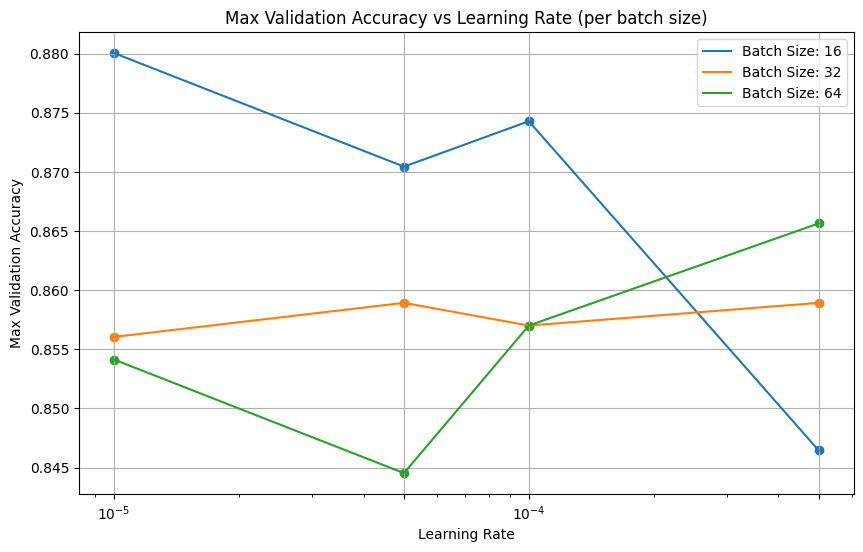

In [ ]:
# plot max val accuracy vs learning rate and batch size
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl', 'rb') as f:
    search_dict_1 = pickle.load(f)

# Create a plot for each batch size
plt.figure(figsize=(10, 6))

for batch_size in set(int(key.split('_')[5][5:]) for key in search_dict_1):
  # Extract learning rates and max validation accuracies for the current batch size
  lrates = []
  max_val_accuracies = []
  for key, value in search_dict_1.items():
    if int(key.split('_')[5][5:]) == batch_size:
      lr = float(key.split('_')[1])
      max_val_acc = max(value['val_acc'])
      lrates .append(lr)
      max_val_accuracies.append(max_val_acc)

  # Sort learning rates and corresponding accuracies
  sorted_indices = sorted(range(len(lrates )), key=lambda i: lrates [i])
  lrates  = [lrates [i] for i in sorted_indices]
  max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]
  plt.plot(lrates , max_val_accuracies, label=f'Batch Size: {batch_size}')
  plt.scatter(lrates , max_val_accuracies)

ticklabels = []
for i in lrates:
  ticklabels.append(str(i))
plt.xticks(lrates, ticklabels)
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.xticks(lrates)
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Learning Rate (per batch size)')
plt.legend()
plt.grid(True)
#plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_lr_split1.png', dpi=200, bbox_inches='tight')
plt.show()

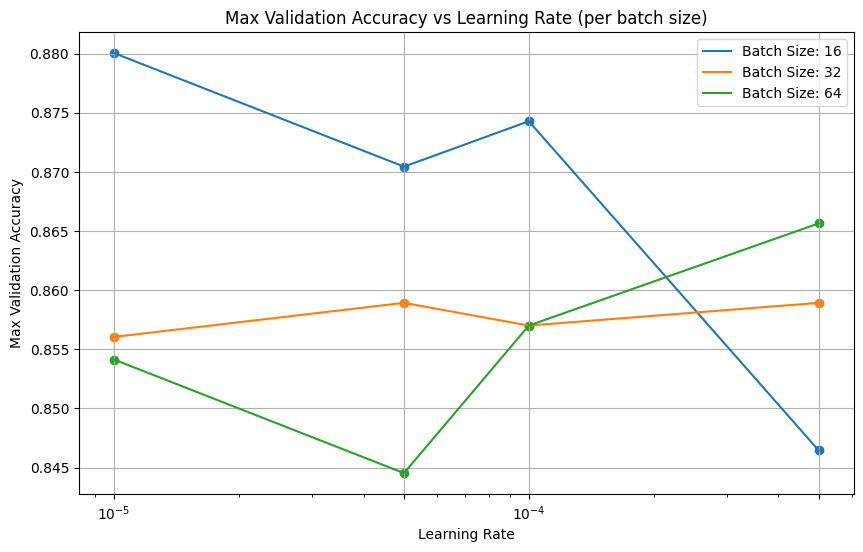

In [ ]:
# plot max val accuracy vs learning rate and batch size
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl', 'rb') as f:
    search_dict_1 = pickle.load(f)


# Create a plot for each batch size
plt.figure(figsize=(10, 6))

for batch_size in set(int(key.split('_')[5][5:]) for key in search_dict_1):
  # Extract learning rates and max validation accuracies for the current batch size
  lrates = []
  max_val_accuracies = []
  for key, value in search_dict_1.items():
    if int(key.split('_')[5][5:]) == batch_size:
      lr = float(key.split('_')[1])
      max_val_acc = max(value['val_acc'])
      lrates .append(lr)
      max_val_accuracies.append(max_val_acc)

  # Sort learning rates and corresponding accuracies
  sorted_indices = sorted(range(len(lrates )), key=lambda i: lrates [i])
  lrates  = [lrates [i] for i in sorted_indices]
  max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]
  plt.plot(lrates , max_val_accuracies, label=f'Batch Size: {batch_size}')
  plt.scatter(lrates , max_val_accuracies)

ticklabels = []
for i in lrates:
  ticklabels.append(str(i))
plt.xticks(lrates, ticklabels)
plt.xlabel('Learning Rate')
plt.xscale('log')
plt.xticks(lrates)
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Learning Rate (per batch size)')
plt.legend()
plt.grid(True)
#plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_lr_split1.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib as mpl
cmap = mpl.colormaps['tab20']

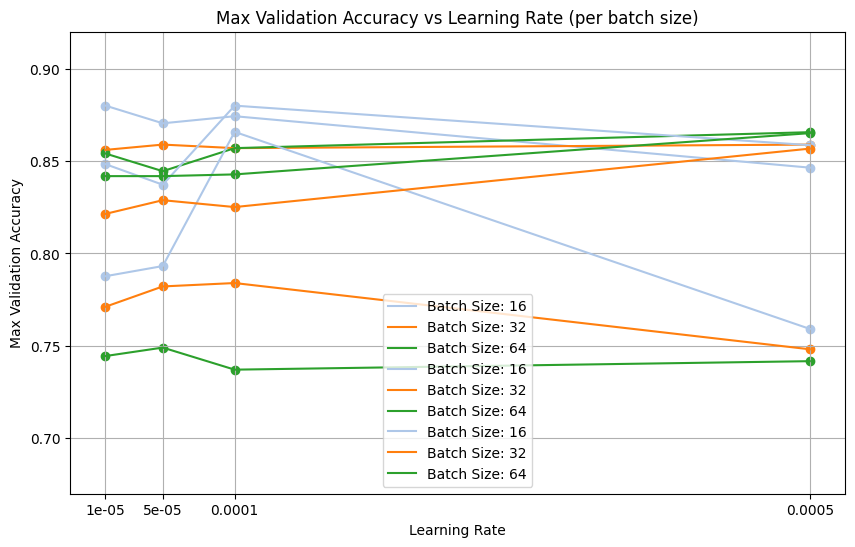

In [ ]:
# plot max val accuracy vs learning rate and batch size
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Load the search results from the pickle file
files = [
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl',
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2.pkl',
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3.pkl'
]
search_results = []

for file in files:
    with open(file, 'rb') as f:
        search_results.append(pickle.load(f))

# Create a plot for each batch size
plt.figure(figsize=(10, 6))

for k in range(3):
  for batch_size in set(int(key.split('_')[5][5:]) for key in search_results[k]):
    # Extract learning rates and max validation accuracies for the current batch size
    lrates = []
    max_val_accuracies = []
    for key, value in search_results[k].items():
      if int(key.split('_')[5][5:]) == batch_size:
        lr = float(key.split('_')[1])
        max_val_acc = max(value['val_acc'])
        lrates .append(lr)
        max_val_accuracies.append(max_val_acc)

    # Sort learning rates and corresponding accuracies
    sorted_indices = sorted(range(len(lrates )), key=lambda i: lrates [i])
    lrates  = [lrates [i] for i in sorted_indices]
    max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]
    plt.plot(lrates, max_val_accuracies, label=f'Batch Size: {batch_size}', color=cmap(int(batch_size/16)))
    plt.scatter(lrates, max_val_accuracies, color=cmap(int(batch_size/16)))

ticklabels = []
for i in lrates:
  ticklabels.append(str(i))
plt.xticks(lrates, ticklabels)
plt.xlabel('Learning Rate')
#plt.xscale('log')
#plt.xticks(lrates)
plt.ylim(0.67,0.92)
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Learning Rate (per batch size)')
plt.legend()
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/v2_results/max_val_acc_vs_lr_and_bs_3splits.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
ticklabels

['1e-05', '5e-05', '0.0001', '0.0005']

In [ ]:
lrates

[1e-05, 5e-05, 0.0001, 0.0005]

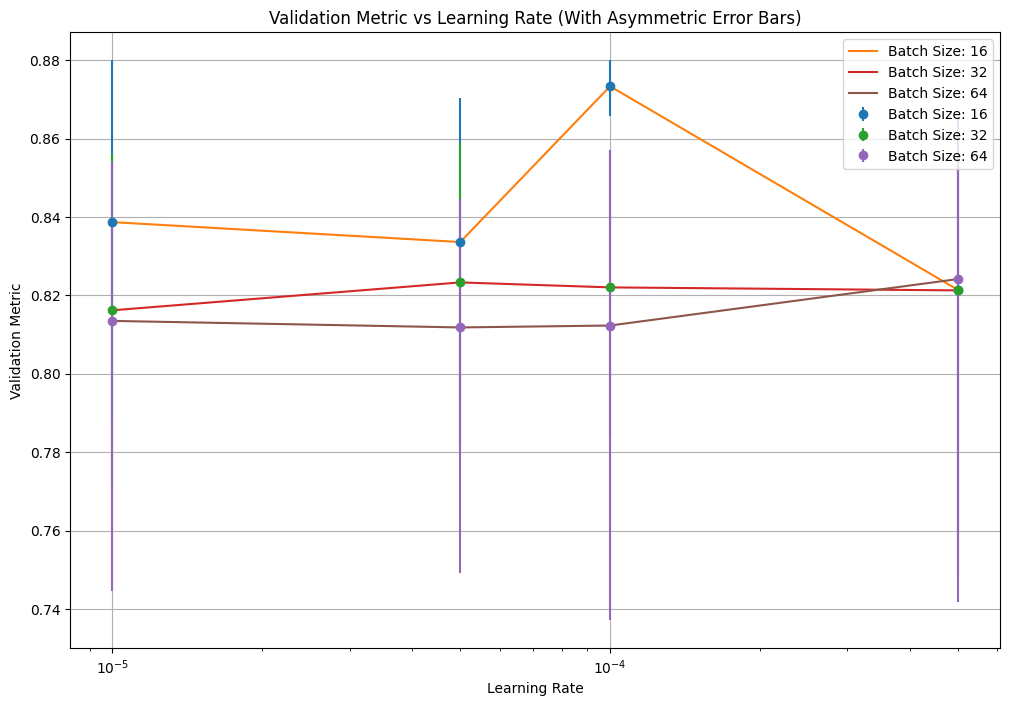

In [ ]:
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

# Load search results from the pickle files
files = [
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl',
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2.pkl',
    'drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3.pkl'
]
search_results = []

for file in files:
    with open(file, 'rb') as f:
        search_results.append(pickle.load(f))

# Prepare the figure
plt.figure(figsize=(12, 8))
plt.xscale('log')
plt.xlabel('Learning Rate')
plt.ylabel('Validation Metric')
plt.title('Validation Metric vs Learning Rate (With Asymmetric Error Bars)')

# Extract unique batch sizes from all files
batch_sizes = set(
    int(key.split('_')[5][5:]) for result in search_results for key in result
)

# Iterate over each batch size
for batch_size in batch_sizes:
    learning_rates = []
    means = []
    lower_errors = []
    upper_errors = []

    for key in search_results[0].keys():
        if int(key.split('_')[5][5:]) == batch_size:
            lr = float(key.split('_')[1])
            values = []

            # Collect the metric values from all files
            for result in search_results:
                if key in result:
                    max_val_acc = max(result[key]['val_acc'])
                    values.append(max_val_acc)

            # Compute mean, lower error, and upper error
            mean_val = np.mean(values)
            lower_error = mean_val - np.min(values)
            upper_error = np.max(values) - mean_val

            # Append to lists
            learning_rates.append(lr)
            means.append(mean_val)
            lower_errors.append(lower_error)
            upper_errors.append(upper_error)

    # Sort by learning rates
    sorted_indices = np.argsort(learning_rates)
    learning_rates = np.array(learning_rates)[sorted_indices]
    means = np.array(means)[sorted_indices]
    lower_errors = np.array(lower_errors)[sorted_indices]
    upper_errors = np.array(upper_errors)[sorted_indices]

    # Plot with asymmetric error bars
    plt.errorbar(
        learning_rates,
        means,
        yerr=[lower_errors, upper_errors],
        fmt='o',
        label=f'Batch Size: {batch_size}'
    )
    plt.plot(learning_rates, means, label=f'Batch Size: {batch_size}')

# Add grid, legend, and formatter
plt.grid(True)
plt.legend()
plt.show()

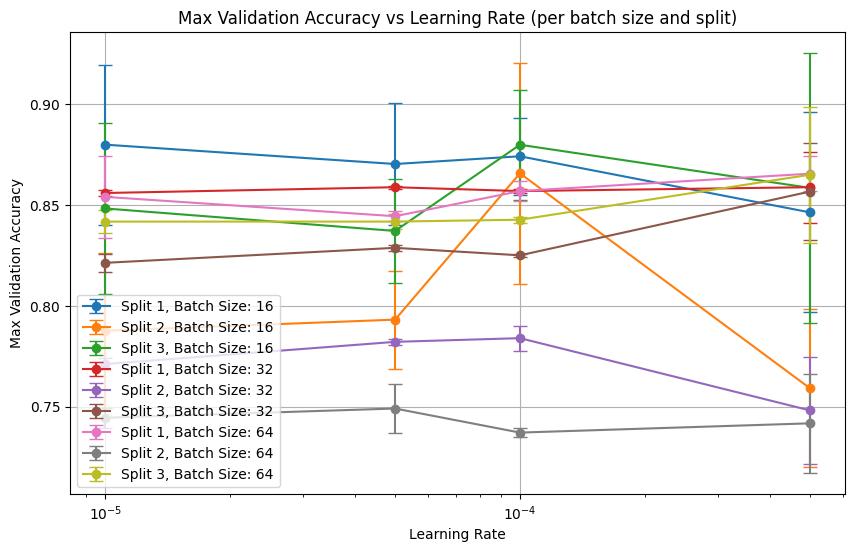

In [ ]:
# Load the search results from the pickle files
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_1.pkl', 'rb') as f:
    search_dict1 = pickle.load(f)
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2.pkl', 'rb') as f:
    search_dict2 = pickle.load(f)
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_3.pkl', 'rb') as f:
    search_dict3 = pickle.load(f)

search_dicts = [search_dict1, search_dict2, search_dict3]

plt.figure(figsize=(10, 6))

for batch_size in set(int(key.split('_')[5][5:]) for key in search_dict1):
    for i, search_dict in enumerate(search_dicts):
        lrates = []
        max_val_accuracies = []
        for key, value in search_dict.items():
            if int(key.split('_')[5][5:]) == batch_size:
                lr = float(key.split('_')[1])
                max_val_acc = max(value['val_acc'])
                lrates.append(lr)
                max_val_accuracies.append(max_val_acc)

        sorted_indices = sorted(range(len(lrates)), key=lambda k: lrates[k])
        lrates = [lrates[k] for k in sorted_indices]
        max_val_accuracies = [max_val_accuracies[k] for k in sorted_indices]

        # Calculate standard deviation as error (replace with your actual error calculation if different)
        errors = [np.std(value['val_acc']) for key, value in search_dict.items() if int(key.split('_')[5][5:]) == batch_size]
        sorted_errors = [errors[k] for k in sorted_indices]

        plt.errorbar(lrates, max_val_accuracies, yerr=sorted_errors,
                     label=f'Split {i+1}, Batch Size: {batch_size}', fmt='-o', capsize=5)

    ticklabels = [str(i) for i in lrates]
    plt.xticks(lrates, ticklabels)

plt.xlabel('Learning Rate')
plt.xscale('log')
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Learning Rate (per batch size and split)')
plt.legend()
plt.grid(True)
plt.show()


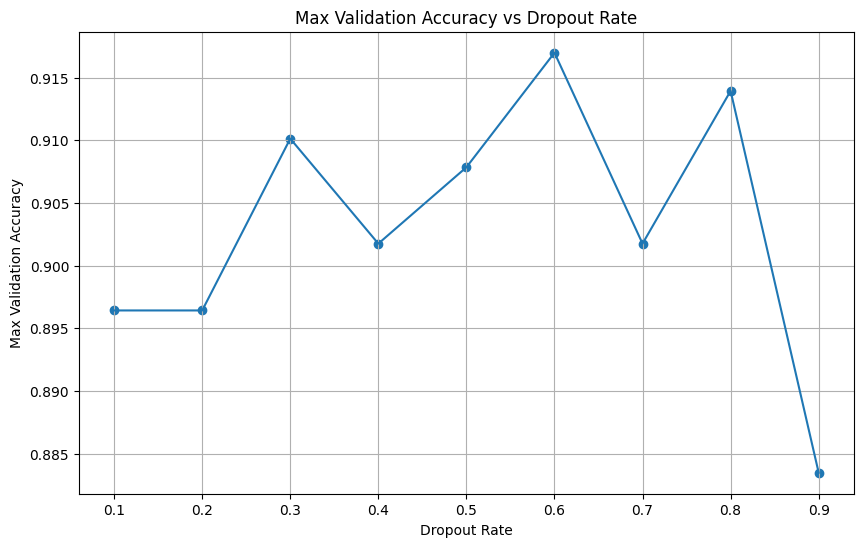

In [ ]:
# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/saved_search_results_3.pkl', 'rb') as f:
    search_dict = pickle.load(f)

# Extract dropout rates and max validation accuracies
dropout_rates = []
max_val_accuracies = []
for key, value in search_dict.items():
    dropout = float(key.split('_')[3])
    max_val_acc = max(value['val_acc'])
    dropout_rates.append(dropout)
    max_val_accuracies.append(max_val_acc)

# Sort dropout rates and corresponding accuracies
sorted_indices = sorted(range(len(dropout_rates)), key=lambda i: dropout_rates[i])
dropout_rates = [dropout_rates[i] for i in sorted_indices]
max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(dropout_rates, max_val_accuracies)
plt.scatter(dropout_rates, max_val_accuracies)
plt.xlabel('Dropout Rate')
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Dropout Rate')
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/max_val_acc_vs_dropout_2.png', dpi=200, bbox_inches='tight')
plt.show()

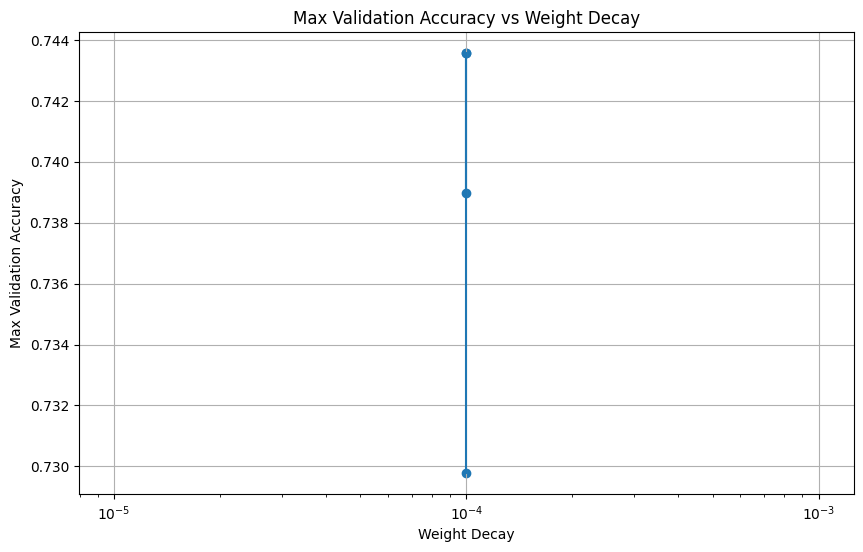

In [ ]:
# Load the search results from the pickle file
with open('drive/MyDrive/lssds24/codelatam/v2_results/saved_search_results_2.pkl', 'rb') as f:
    search_dict = pickle.load(f)

# Extract weight decay and max validation accuracies
weight_decays = []
max_val_accuracies = []
for key, value in search_dict.items():
    wd = float(key.split('_')[-1])
    max_val_acc = max(value['val_acc'])
    weight_decays.append(wd)
    max_val_accuracies.append(max_val_acc)

# Sort weight decays and corresponding accuracies
sorted_indices = sorted(range(len(weight_decays)), key=lambda i: weight_decays[i])
weight_decays = [weight_decays[i] for i in sorted_indices]
max_val_accuracies = [max_val_accuracies[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(weight_decays, max_val_accuracies)
plt.scatter(weight_decays, max_val_accuracies)
plt.xscale('log')  # Use a logarithmic scale for the x-axis
plt.xlabel('Weight Decay')
plt.ylabel('Max Validation Accuracy')
plt.title('Max Validation Accuracy vs Weight Decay')
plt.grid(True)
plt.savefig('drive/MyDrive/lssds24/codelatam/max_val_acc_vs_wd.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# !pip install -q tensorboard

In [ ]:
# # prompt: run tensorboard
# %load_ext tensorboard
# %tensorboard --logdir runs

## Train results

In [ ]:
# Load the plotting data of the last run from the pickle file
with open('drive/MyDrive/lssds24/codelatam/plot_results.pkl', 'rb') as f:
    plots_dict = pickle.load(f)

for key, values in plots_dict.items():
  t_loss, t_acc, t_f1, v_loss, v_acc, v_f1 = values

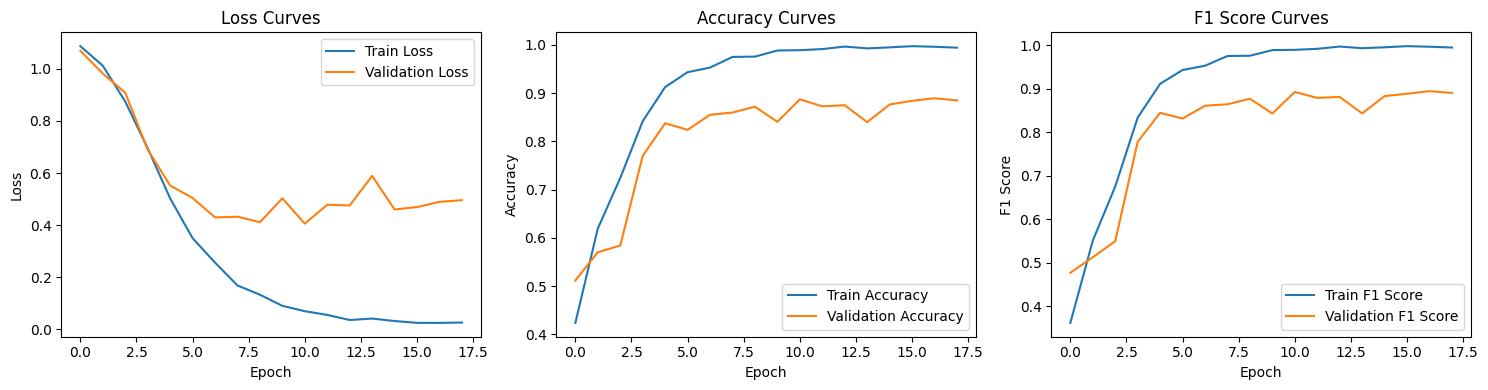

In [ ]:
# Create a 1x3 grid of subplots
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot Loss
axes[0].plot(t_loss, label='Train Loss')
axes[0].plot(v_loss, label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss Curves')
axes[0].legend()

# Plot Accuracy
axes[1].plot(t_acc, label='Train Accuracy')
axes[1].plot(v_acc, label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title('Accuracy Curves')
axes[1].legend()

# Plot F1 Score
axes[2].plot(t_f1, label='Train F1 Score')
axes[2].plot(v_f1, label='Validation F1 Score')
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('F1 Score')
axes[2].set_title('F1 Score Curves')
axes[2].legend()

# Adjust spacing between subplots
plt.tight_layout()
plt.savefig('drive/MyDrive/lssds24/codelatam/training.png', dpi=200, bbox_inches='tight')
# Show the plot
plt.show()

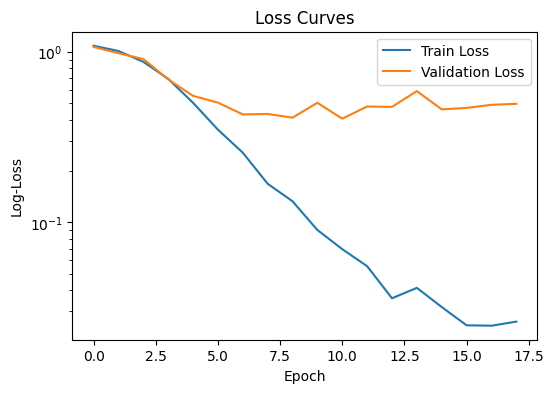

In [ ]:
# Log loss
fig, axes = plt.subplots(figsize=(6, 4))

# Plot Loss
axes.plot(t_loss, label='Train Loss')
axes.plot(v_loss, label='Validation Loss')
axes.set_yscale('log')
axes.set_xlabel('Epoch')
axes.set_ylabel('Log-Loss')
axes.set_title('Loss Curves')
axes.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/log-loss.png', dpi=200, bbox_inches='tight')

### Inference

In [ ]:
# load best_model.pth, set to eval_mode
# carpeta compartida de Juan para cargar archivo de modelo "best_model.pth"
# https://drive.google.com/drive/folders/1I9gk_JM-oFOD4xplydMrtrNrqHZeU0Jo?usp=sharing


model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['model'])
classifier.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['classifier'])
model.eval()
classifier.eval()

outputs = []
with torch.no_grad():
    for batch_data in test_dataloader:
        outputs.append(predict_step(batch_data, model, processor, classifier, device))

<ipython-input-28-7207d45d4b5c>:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('drive/MyDrive/lssds24/codelatam/best_model.pth')['model'])

In [ ]:
outputs[0].keys()

dict_keys(['id', 'y_pred', 'y_pred_prob', 'y_true'])

In [ ]:
keys = outputs[0].keys()
outputs_dict = {key: [] for key in keys}

for i in range(len(outputs)):
    for key in keys:
        outputs_dict[key].append(outputs[i][key])

outputs_dict = {key: np.concatenate(values) for key, values in outputs_dict.items()}
outputs_dict

{'id': array(['sn2002es_2_0_26.7_2356_213_COPY', 'sn2005eq_1_0_-8.3_3601',
        'sn2002cx_4_0_24.0_3792_369_COPY', ...,
        'sn2011dh_8_1_-16.6_4528149_COPY',
        'sn2004aw_12_2_30.2_2923126_COPY',
        'sn2004aw_12_2_1.9_2910182_COPY'], dtype='<U32'),
 'y_pred': array([1, 0, 1, ..., 2, 2, 2]),
 'y_pred_prob': array([[6.6669825e-03, 9.8316956e-01, 1.0163520e-02],
        [9.7891164e-01, 1.9604765e-02, 1.4835926e-03],
        [3.5536950e-03, 9.9488926e-01, 1.5569855e-03],
        ...,
        [9.7820885e-04, 1.7673217e-03, 9.9725455e-01],
        [1.1863629e-03, 1.7427208e-03, 9.9707091e-01],
        [1.3273058e-03, 2.9976605e-03, 9.9567503e-01]], dtype=float32),
 'y_true': array([1, 1, 1, ..., 2, 2, 2])}

In [ ]:
outputs_dict['y_true'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_true']]
outputs_dict['y_pred'] = [inv_dict_mapping_classes[val] for val in outputs_dict['y_pred']]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(outputs_dict['y_true'], outputs_dict['y_pred'], digits=4))

              precision    recall  f1-score   support

     Ia-norm     0.8768    0.9368    0.9059       380
      Ia-pec     0.6560    0.6424    0.6491       288
      Others     0.8427    0.7979    0.8197       376

    accuracy                         0.8056      1044
   macro avg     0.7919    0.7924    0.7915      1044
weighted avg     0.8036    0.8056    0.8040      1044



### Confusion matrix

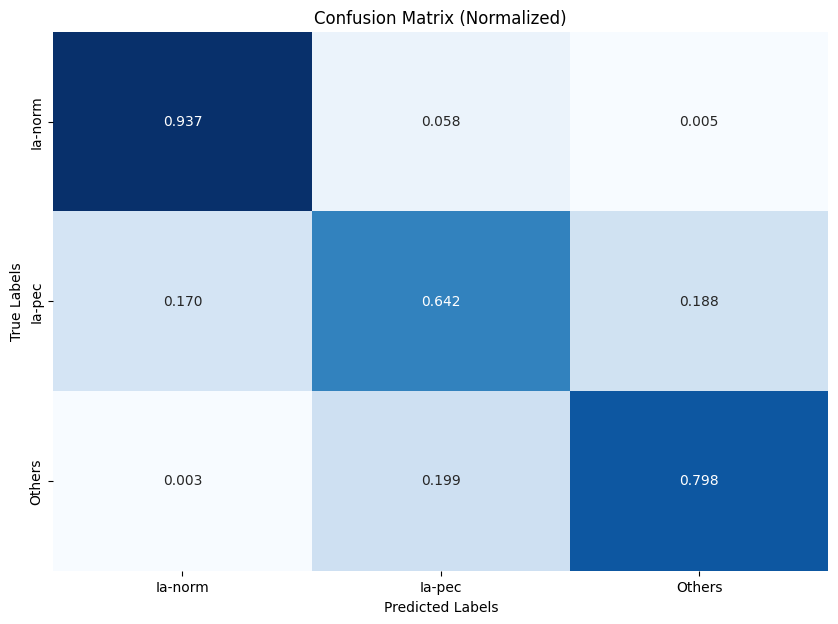

In [ ]:
# plot confusion matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have 'outputs_dict' with 'y_true' and 'y_pred'

# Crear la matriz de confusión
cm = confusion_matrix(outputs_dict['y_true'], outputs_dict['y_pred'])

# Normalizar la matriz de confusión por filas (verdaderos)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Obtener los nombres de las clases desde el diccionario
class_names = inv_dict_mapping_classes.values()

# Dibujar el heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Normalized)')
plt.savefig('drive/MyDrive/lssds24/codelatam/confusion_matrix.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
subtype_mapping = {0: 'Ia-norm',
                   1: 'Ia-91T',
                   2: 'Ia-91bg',
                   3: 'Ia-csm',
                   4: 'Iax',
                   5: 'Ia-pec',
                   6: 'Ib-norm',
                   7: 'Ibn',
                   8: 'IIb',
                   9: 'Ib-pec',
                   10: 'Ic-norm',
                   11: 'Ic-broad',
                   12: 'Ic-pec',
                   13: 'IIP',
                   14: 'IIL',
                   15: 'IIn',
                   16: 'II-pec'}

### Missclassified images

In [ ]:
# identify all missclassified Images
missclassified_ia_norm_as_ia_pec = []
missclassified_ia_norm_as_others = []
missclassified_ia_pec_as_ia_norm = []
missclassified_ia_pec_as_others = []
missclassified_others_as_ia_norm = []
missclassified_others_as_ia_pec = []

for i in range(len(outputs_dict['y_true'])):
  if outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Ia-pec':
    missclassified_ia_norm_as_ia_pec.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-norm' and outputs_dict['y_pred'][i] == 'Others':
    missclassified_ia_norm_as_others.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-pec' and outputs_dict['y_pred'][i] == 'Ia-norm':
    missclassified_ia_pec_as_ia_norm.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Ia-pec' and outputs_dict['y_pred'][i] == 'Others':
    missclassified_ia_pec_as_others.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Others' and outputs_dict['y_pred'][i] == 'Ia-norm':
    missclassified_others_as_ia_norm.append(outputs_dict['id'][i])
  elif outputs_dict['y_true'][i] == 'Others' and outputs_dict['y_pred'][i] == 'Ia-pec':
    missclassified_others_as_ia_pec.append(outputs_dict['id'][i])

print("Missclassified Ia-norm as Ia-pec images:")
print(missclassified_ia_norm_as_ia_pec)

print("Missclassified Ia-norm as Others images:")
print(missclassified_ia_norm_as_others)

Missclassified Ia-norm as Ia-pec images:
['sn94D_0_0_26.2_148', 'sn98bu_0_0_279.684_1598', 'sn1992A_0_0_225.0_773', 'sn2006cc_0_0_-9.7_2103', 'sn1996C_0_0_7.8_2619', 'sn02cs_0_0_84.321_1320', 'sn98bu_0_0_235.773_1597', 'sn2002de_0_0_-5.0_457', 'sn2002de_0_0_-4.1_458', 'sn94D_0_0_-5.6_124', 'sn06cf_0_0_11.118_2900', 'sn2003cg_0_0_1.0_797', 'sn95D_0_0_92.488_3939', 'sn2007ci_0_0_16.5_2997', 'sn2001ex_0_0_-3.4_1419', 'sn1998co_0_0_24.6_1296', 'sn2006le_0_0_-11.7_3082', 'sn1998co_0_0_28.4_1297', 'sn98bu_0_0_1.2_1909', 'sn1994T_0_0_0.8_3872', 'sn2003cg_0_0_382.6_821', 'sn2007ci_0_0_21.4_2999']
Missclassified Ia-norm as Others images:
['sn2003cg_0_0_-8.9_780', 'sn2002eu_0_0_60.7_3453']


In [ ]:
# make the plot in a nxn grid
import matplotlib.pyplot as plt

def plot_missclassified_images(image_ids, root_dir, subfolder, prediction, ncols=3):
  """Plots missclassified images from a list of image IDs in a grid.

  Args:
      image_ids: A list of image IDs.
      root_dir: The root directory where the images are stored.
      subfolder: The subfolder within the root directory where the images are stored.
      ncols: Number of columns in the grid.
  """

  nrows = (len(image_ids) + ncols - 1) // ncols  # Calculate the number of rows needed
  fig, axes = plt.subplots(nrows, ncols, figsize=(15, 3 * nrows))

  # Check if axes is 1-dimensional and convert to 2-dimensional if necessary
  if nrows == 1 or ncols == 1:
    axes = axes.reshape(nrows, ncols) # added this line to reshape axes to 2d if it's 1d

  for i, image_id in enumerate(image_ids):
    image_path = os.path.join(root_dir, subfolder, image_id + ".png")
    if os.path.exists(image_path):
      img = plt.imread(image_path)
      row = i // ncols
      col = i % ncols
      axes[row, col].imshow(img)
      axes[row, col].set_title(f"Missclassified Image: {image_id}\n Label: {inv_dict_mapping_classes[maping(int(image_id.split('_')[1]))]}, Subtype: {subtype_mapping[int(image_id.split('_')[1])]} \n Prediction: {prediction}")
      axes[row, col].axis('off')  # Turn off axis labels and ticks
  # Remove any empty subplots
  for i in range(len(image_ids), nrows * ncols):
    row = i // ncols
    col = i % ncols
    fig.delaxes(axes[row, col])

  plt.tight_layout()
  plt.show()

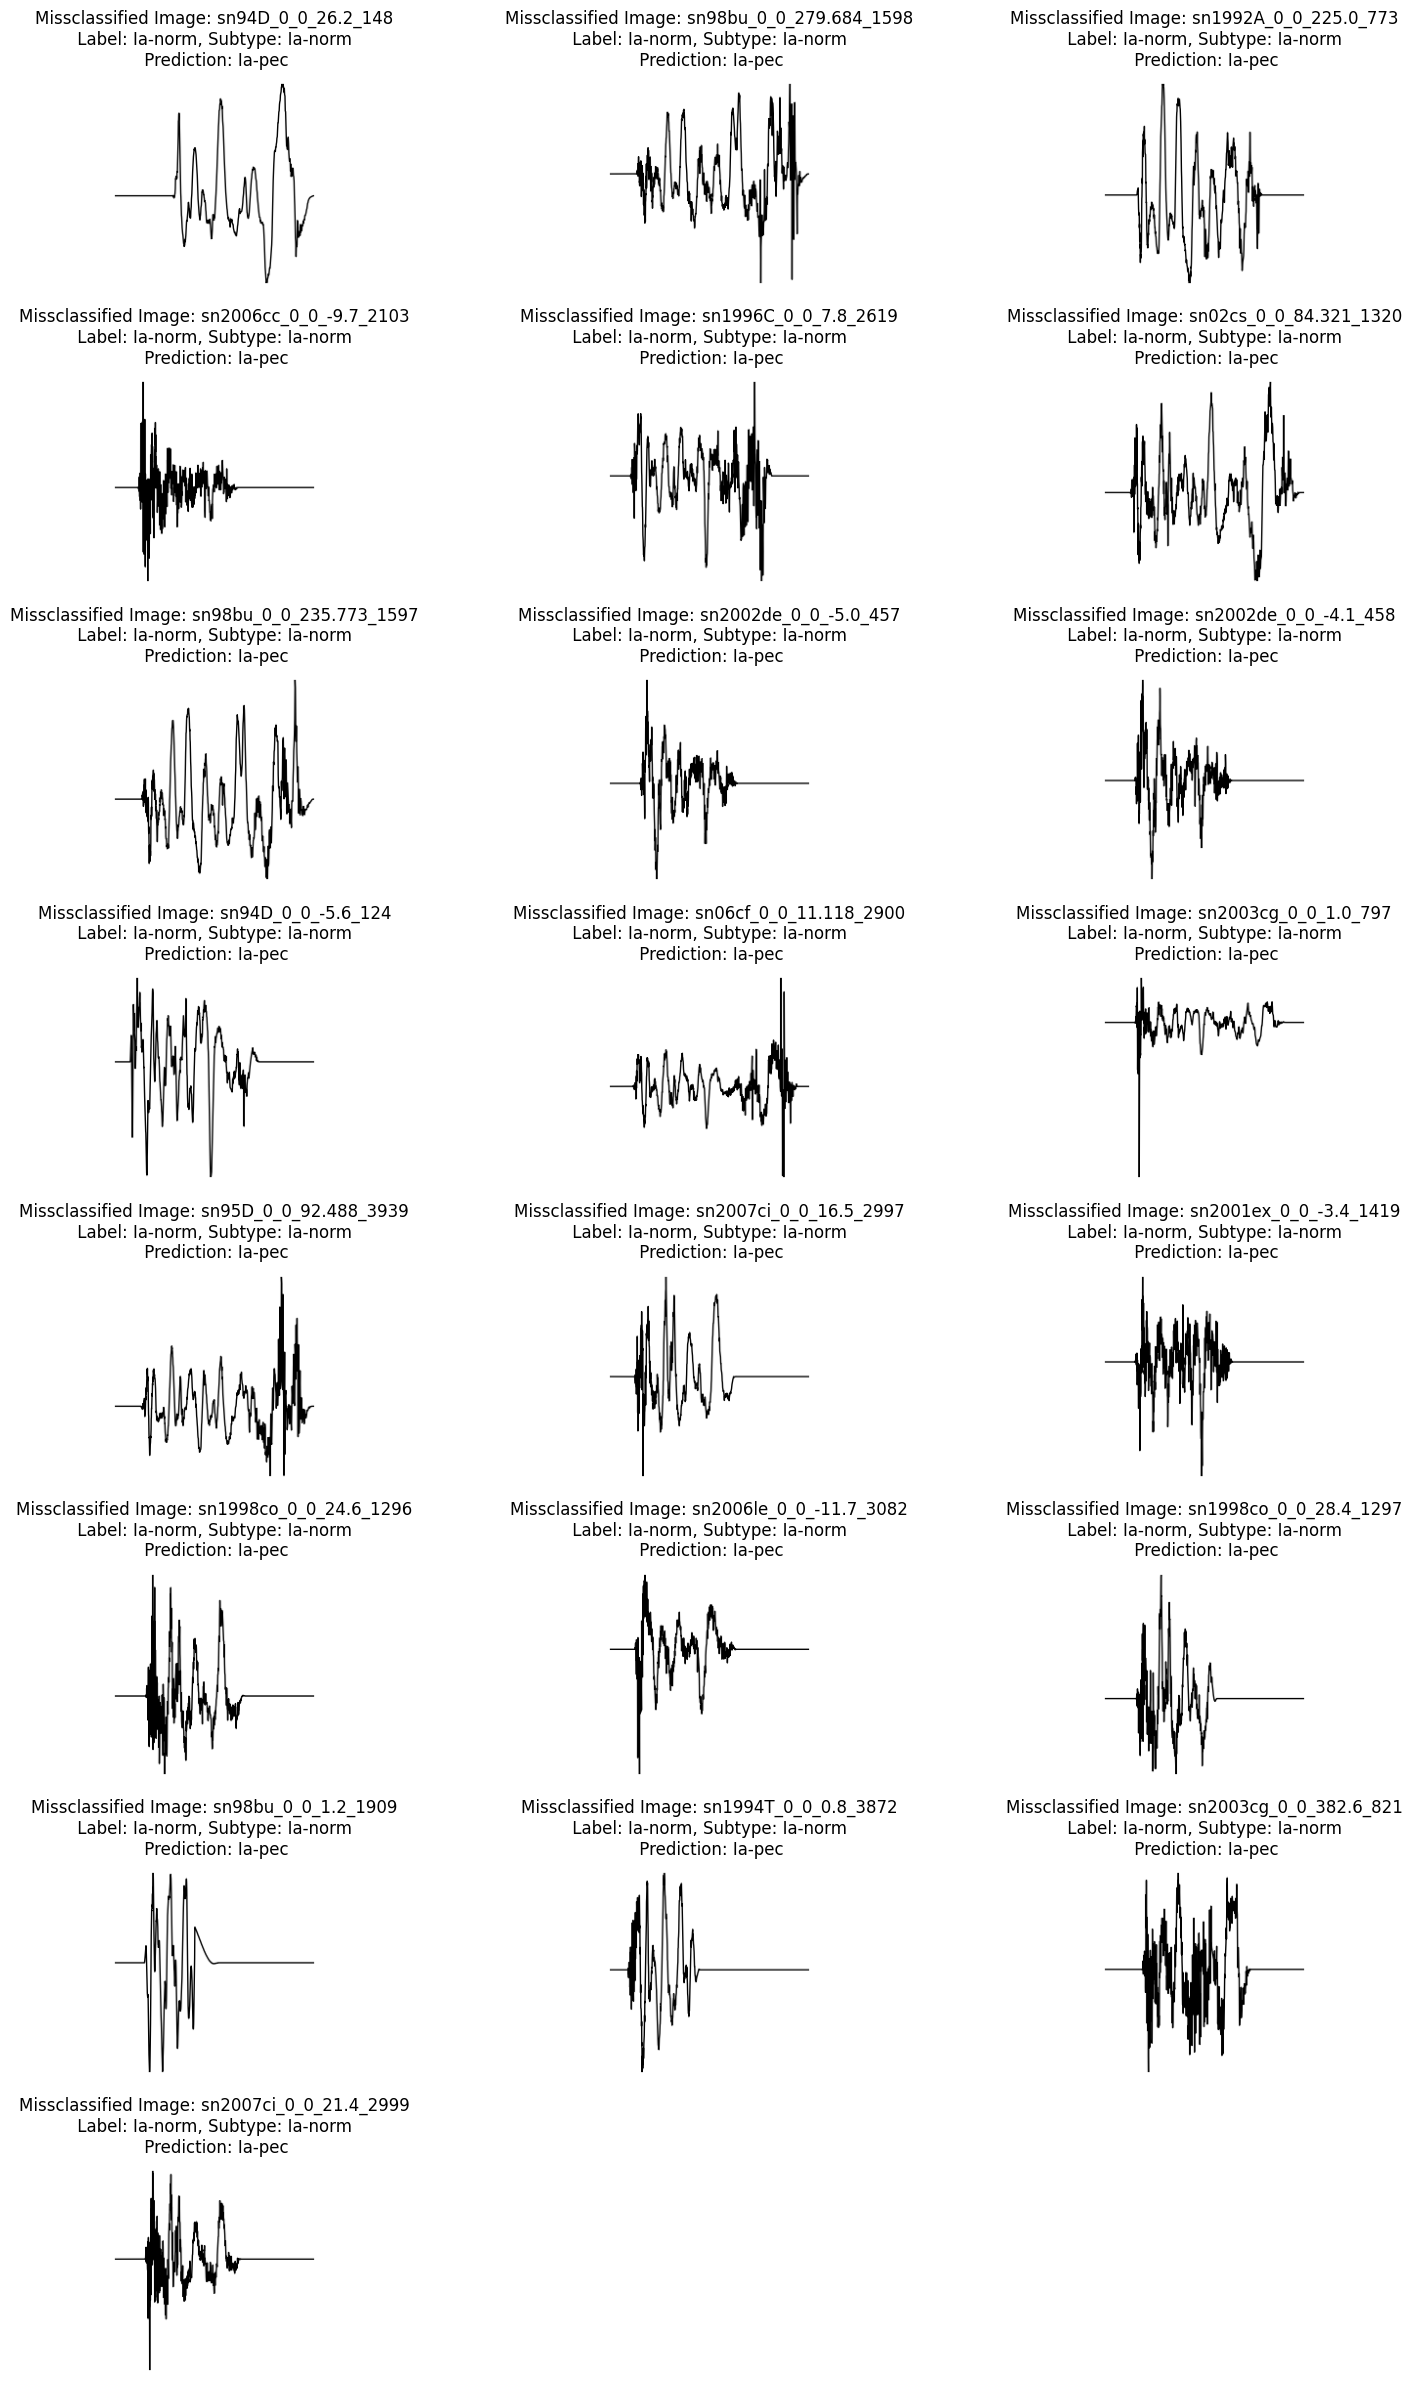

In [ ]:
# Plot the Ia-norm missclassified as ia-pec
plot_missclassified_images(missclassified_ia_norm_as_ia_pec, root_dir, "0", prediction='Ia-pec', ncols=3)

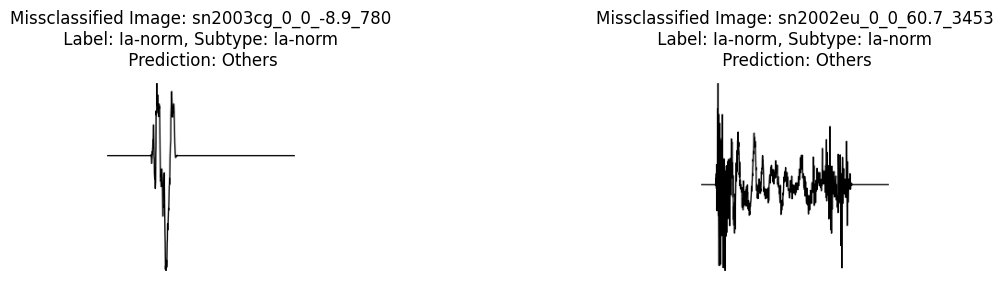

In [ ]:
# Plot the Ia-norm missclassified as other
plot_missclassified_images(missclassified_ia_norm_as_others, root_dir, "0", prediction='Others', ncols=2)

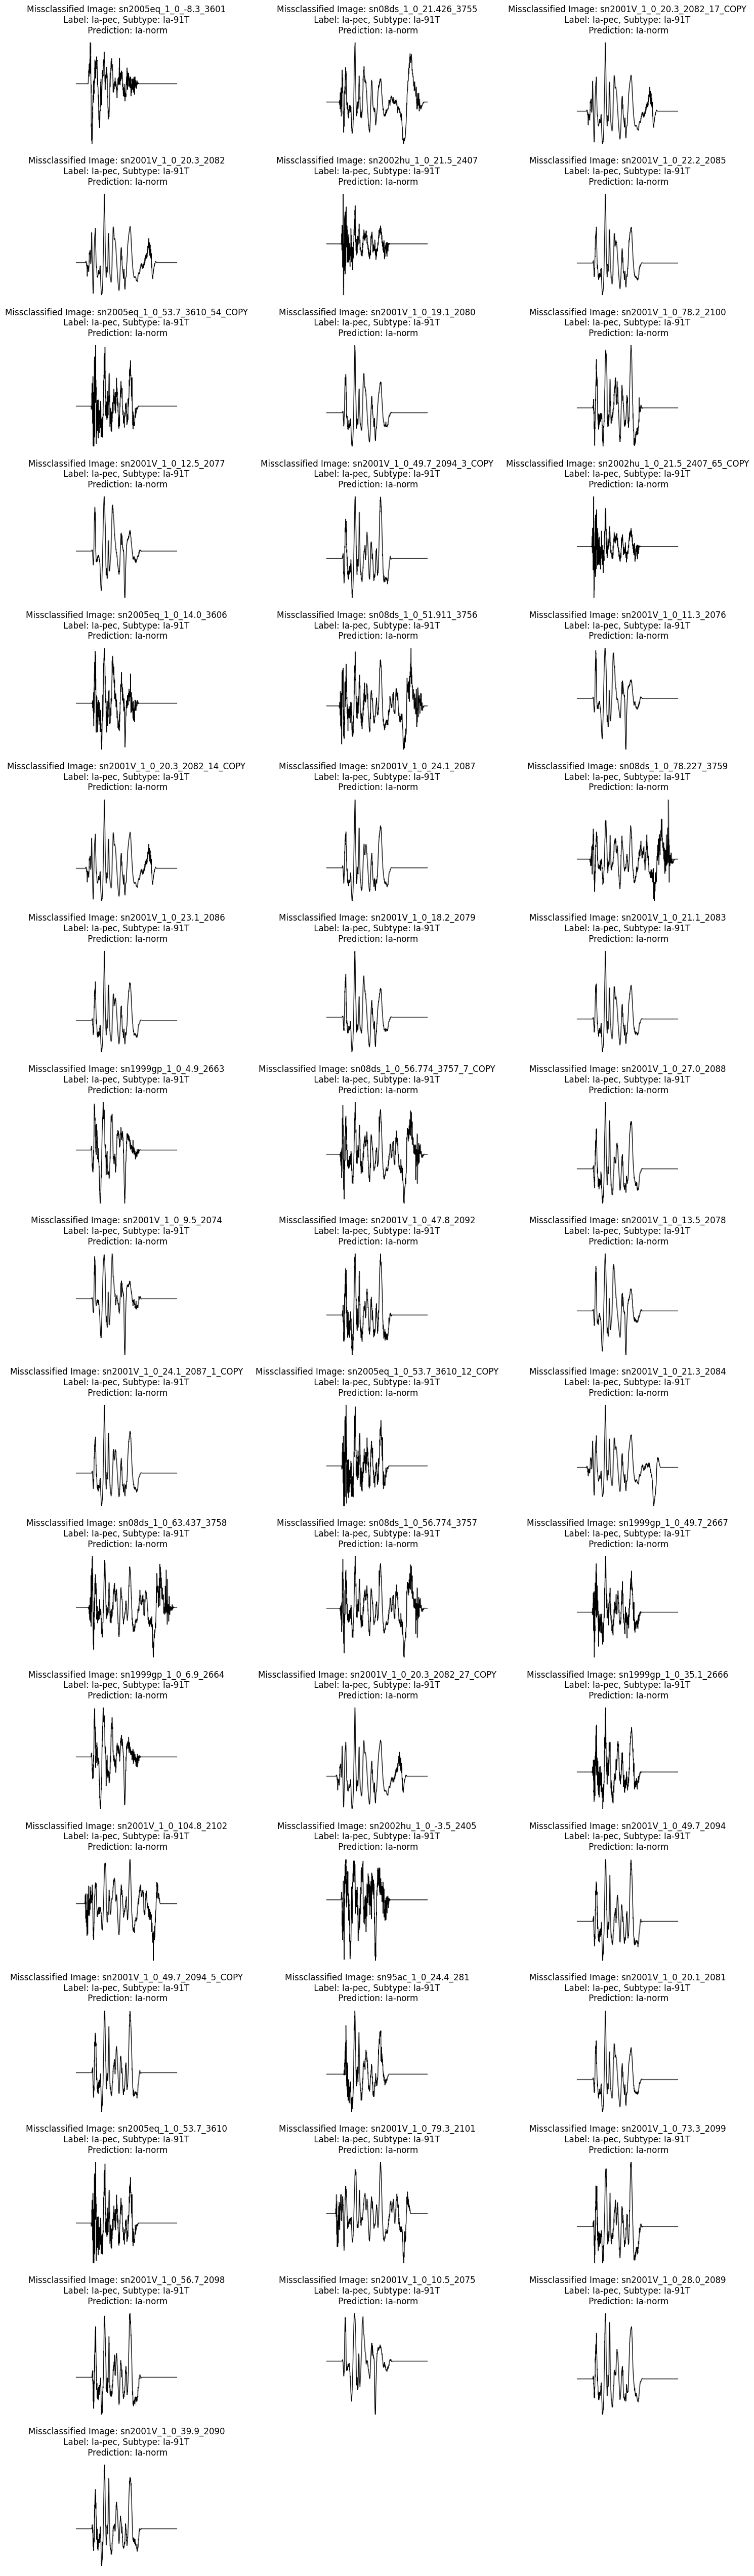

In [ ]:
#plot the Ia-pec missclassified as Ia-norm
plot_missclassified_images(missclassified_ia_pec_as_ia_norm, root_dir, "1", prediction='Ia-norm', ncols=3)

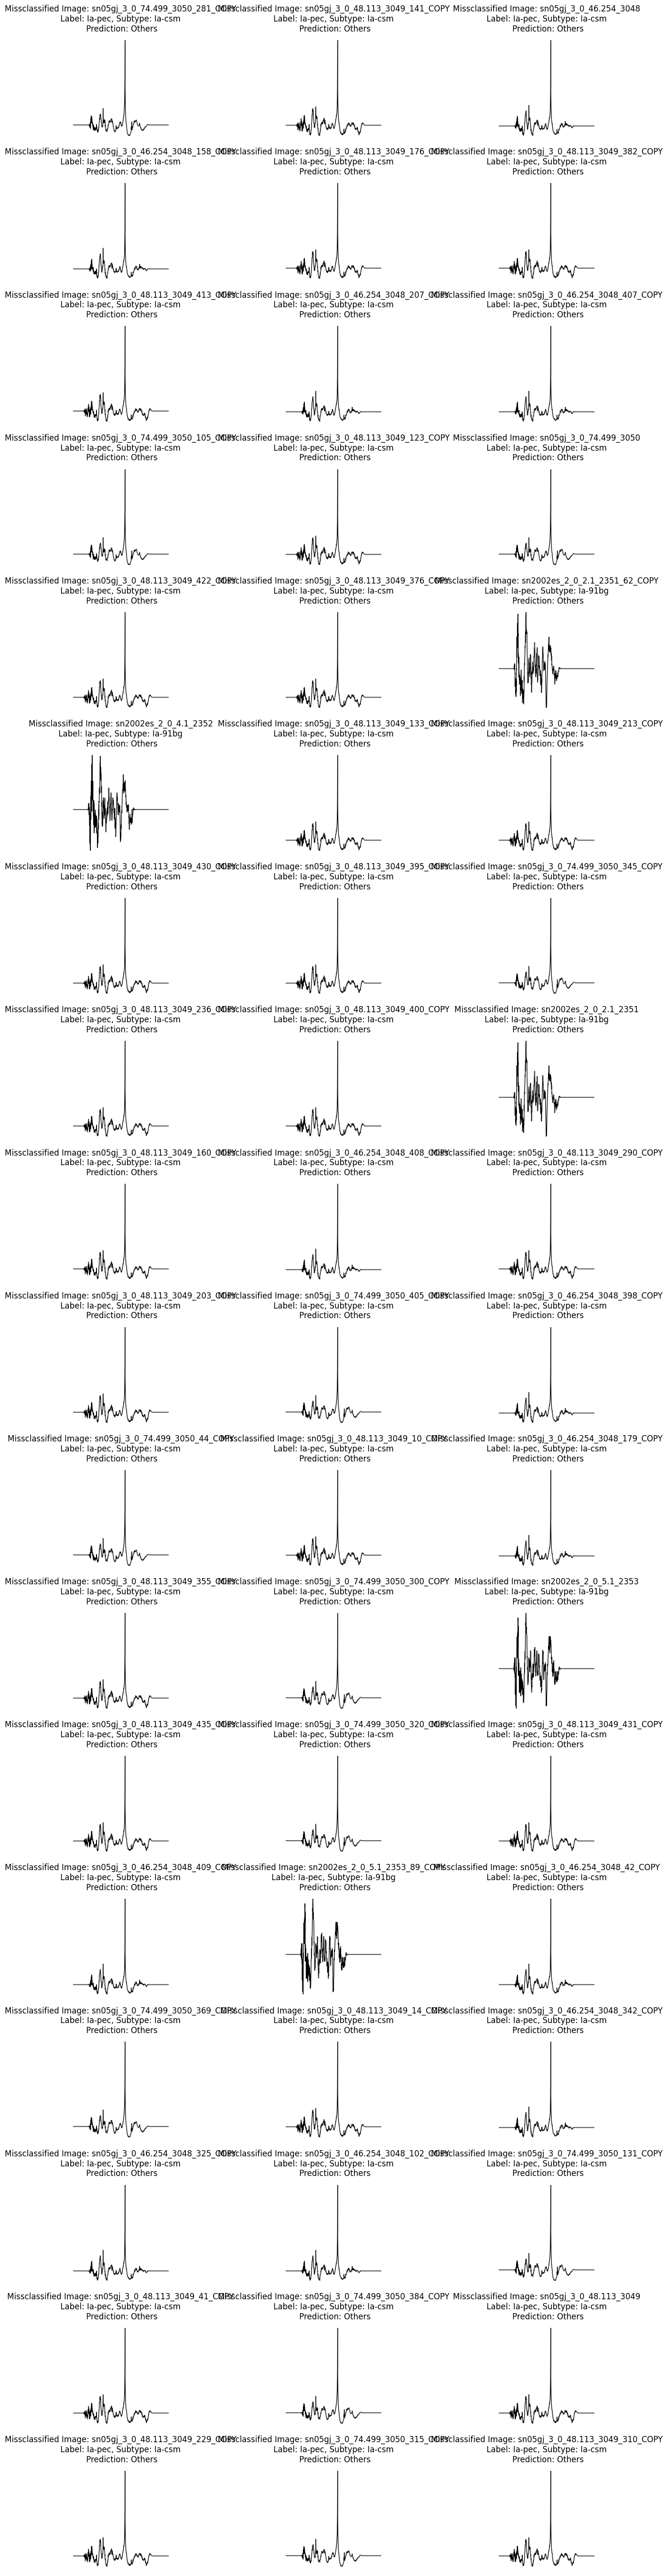

In [ ]:
plot_missclassified_images(missclassified_ia_pec_as_others, root_dir, "1", prediction='Others', ncols=3)

In [ ]:
# check how many Ia-91T are in test set, also save phases
Ia91t_in_test = []
phases = []
for i in splits['1']['test']:
  a = i.split('_')[1]
  if a == '1':
    Ia91t_in_test.append(i.split('_')[0])
    phases.append(float(i.split('_')[3]))
print(list(set(Ia91t_in_test)))
print('Ia-91T in test set:', len(Ia91t_in_test))
print('Ia-91T missclassified:', len(missclassified_ia_pec_as_ia_norm))

['sn2002hu', 'sn08ds', 'sn2001V', 'sn1999gp', 'sn95ac', 'sn2005eq']
Ia-91T in test set: 92
Ia-91T missclassified: 49


In [ ]:
miss_phases = []
for image_name in missclassified_ia_pec_as_ia_norm:
  miss_phases.append(float(image_name.split('_')[3]))

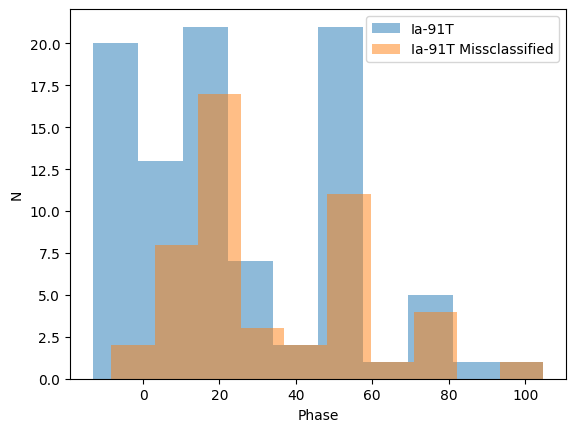

In [ ]:
plt.hist(phases, alpha=0.5, label='Ia-91T')
plt.hist(miss_phases, alpha=0.5, label='Ia-91T Missclassified')
plt.xlabel('Phase')
plt.ylabel('N')
plt.legend()
plt.savefig('drive/MyDrive/lssds24/codelatam/Ia-91T-phases-histogram.png', dpi=200, bbox_inches='tight')
plt.show()

In [ ]:
# I want to check if the Ia-norm's missclassified as Ia-pec are generally older SNs
# Need to get the year of the SN and plot an histogram of

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/juanserrano90/codelatam/refs/heads/main/Data/Redshift/sn_redshift.csv')

In [ ]:
years_miss = []
for image_name in missclassified_ia_norm_as_ia_pec:
  name = image_name.split('_')[0].lower()
  year = df[df['old_name'] == name]['year'].values[0]
  years_miss.append(year)
print(len(years_miss), len(missclassified_ia_norm_as_ia_pec))

years_ianorm = []
unique_ianorms = []
for image_name in image_lists['0']:
  name = image_name.split('_')[0].lower()
  if name not in unique_ianorms:
    unique_ianorms.append(name)
    year = df[df['old_name'] == name]['year'].values[0]
    years_ianorm.append(year)
print(len(years_ianorm), len(image_lists['0']))
print(len(unique_ianorms))

22 22
319 2387
319


In [ ]:
print(np.array(years_ianorm).min(), np.array(years_ianorm).max())

1981 2008


Median year for Ia-norm: 2003.0
Median year for missclassified Ia-norm: 1999.5
Total count of Ia-norm: 319
Total count of missclassified Ia-norm: 22


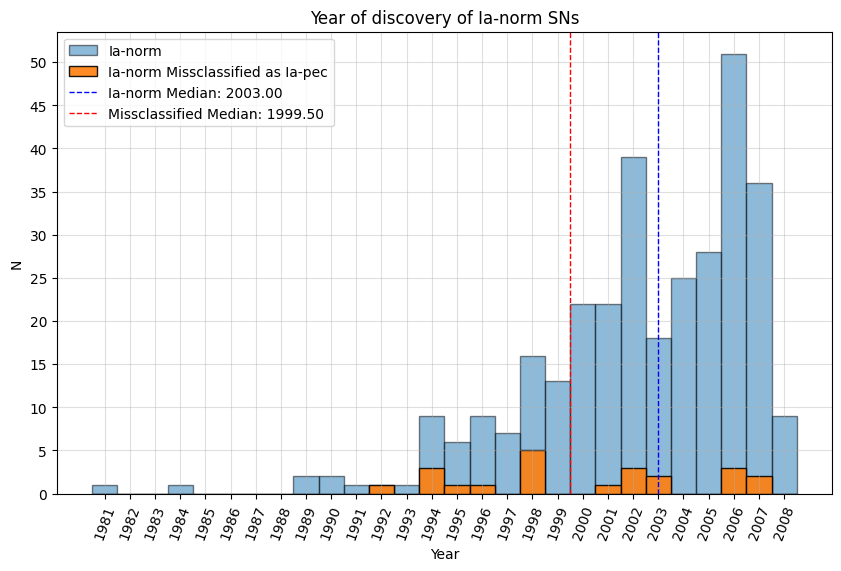

In [ ]:
# Calculate medians and counts
median_ianorm = np.median(years_ianorm)
median_missclassified = np.median(years_miss)
count_ianorm = len(years_ianorm)
count_missclassified = len(years_miss)

# Print or use the results as needed
print(f"Median year for Ia-norm: {median_ianorm}")
print(f"Median year for missclassified Ia-norm: {median_missclassified}")
print(f"Total count of Ia-norm: {count_ianorm}")
print(f"Total count of missclassified Ia-norm: {count_missclassified}")

# Example of adding the medians to a plot (assuming the plot code from your example)

fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(years_ianorm, alpha=0.5, bins=np.arange(1981, 2010), align='left', edgecolor='black', label='Ia-norm')
ax.hist(years_miss, alpha=0.9, bins=np.arange(1981, 2010), align='left', edgecolor='black', label='Ia-norm Missclassified as Ia-pec')
ax.axvline(median_ianorm, color='blue', linestyle='dashed', linewidth=1, label=f'Ia-norm Median: {median_ianorm:.2f}')
ax.axvline(median_missclassified, color='red', linestyle='dashed', linewidth=1, label=f'Missclassified Median: {median_missclassified:.2f}')


plt.xlabel('Year')
plt.xticks(np.arange(1981, 2009), rotation=70)
plt.yticks(np.arange(0, 51, 5))
plt.ylabel('N')
plt.title('Year of discovery of Ia-norm SNs')
plt.legend()
plt.grid(True, alpha=0.4)
plt.savefig('drive/MyDrive/lssds24/codelatam/Ia-norm-missclassidief-years-histogram_with_medians.png', dpi=200, bbox_inches='tight')
plt.show()